In [169]:
#import some necessary librairies
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from scipy.stats import norm, skew #for some statistics
from subprocess import check_output

In [170]:
train=pd.read_csv('traindisgardoutlier.csv');
test=pd.read_csv('test.csv');
Priceorigin=train["SalePrice"];

### skew


 mu = 180876.74 and sigma = 79490.28



Text(0.5,1,'SalePrice distribution')

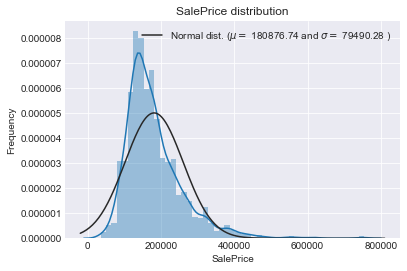

In [171]:
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')



 mu = 12.02 and sigma = 0.40



Text(0.5,1,'SalePrice distribution')

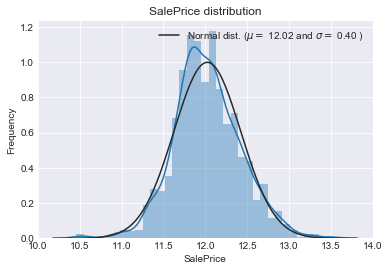

In [172]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["SalePrice"] = np.log1p(train["SalePrice"])
Price=train["SalePrice"]

#Check the new distribution 
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')


In [174]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
all_data.drop("Id", axis = 1, inplace = True);
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2912, 79)


### Find missing value ratio

In [175]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data

,Missing Ratio
PoolQC,99.690934
MiscFeature,96.428571
Alley,93.234890
Fence,80.391484
FireplaceQu,48.695055
LotFrontage,16.655220
GarageQual,5.425824
GarageCond,5.425824
GarageFinish,5.425824
GarageYrBlt,5.425824


#### drop data with too many NANs

In [176]:
all_data.drop(['PoolQC'], axis=1, inplace=True)
all_data.drop(['PoolArea'], axis=1, inplace=True)

### Fill nan value

In [177]:
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")
all_data["Alley"] = all_data["Alley"].fillna("None")
all_data["Fence"] = all_data["Fence"].fillna("None")
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

In [178]:
#categorical attributes that NA has no meaning
for col2 in ('MSZoning', 'Utilities', 'Functional', 'Electrical', 'Exterior1st', 'Exterior2nd', 'SaleType', 'KitchenQual'):
    all_data[col2] = all_data[col2].fillna(all_data[col2].mode()[0])

In [179]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [180]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

In [181]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

In [183]:
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

In [184]:
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

In [185]:
all_data["Functional"] = all_data["Functional"].fillna("Typ")
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

#### Check missing value

In [187]:
#Check remaining missing values if any 
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


### Add alternative features

In [188]:
def transform(X):
    X["TotalHouse"] = X["TotalBsmtSF"] + X["1stFlrSF"] + X["2ndFlrSF"]   
    X["TotalArea"] = X["TotalBsmtSF"] + X["1stFlrSF"] + X["2ndFlrSF"] + X["GarageArea"]            
    X["+_GrLivArea_OverallQual"] = X["GrLivArea"] * X["OverallQual"]
    X["+_BsmtFinSF1_OverallQual"] = X["BsmtFinSF1"] * X["OverallQual"]            
    X["-_LotArea_OverallQual"] = X["LotArea"] * X["OverallQual"]
    X["-_TotalHouse_LotArea"] = X["TotalHouse"] + X["LotArea"]          
    X["Bsmt"] = X["BsmtFinSF1"] + X["BsmtFinSF2"] + X["BsmtUnfSF"]
    X["Rooms"] = X["FullBath"]+X["TotRmsAbvGrd"]
    X["PorchArea"] = X["OpenPorchSF"]+X["EnclosedPorch"]+X["3SsnPorch"]+X["ScreenPorch"]
    X["TotalPlace"] = X["TotalBsmtSF"] + X["1stFlrSF"] + X["2ndFlrSF"] + X["GarageArea"] + X["OpenPorchSF"]+X["EnclosedPorch"]+X["3SsnPorch"]+X["ScreenPorch"]

    return X

In [287]:
X=transform(all_data)
X.shape

(2912, 87)

### dummy categorical data

In [288]:
X_origin = X
X = pd.get_dummies(X)
print(X.shape)

(2912, 306)


 #### split out the kaggle test data

In [193]:
train = X[:ntrain]
test = X[ntrain:]

In [194]:
#train.to_csv('trainhot.csv', index = False)
#test.to_csv('testhot.csv', index = False)
#Price.to_csv('Pricenorm.csv', index = False)

### Train model

In [195]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

#### define cross validate score function

In [199]:
#Validation function
n_folds = 10

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, Price, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [ ]:
##################################################################################

#### Linear regression

##### preprocess data

In [293]:
X_lr = X_origin[:ntrain]
y_lr = Price
print('X_lr shape: ', X_lr.shape)
print('y_lr shape: ', y_lr.shape)

X_lr shape:  (1453, 87)
y_lr shape:  (1453,)


Encoding

In [298]:
categoricals = X_lr.select_dtypes(exclude=[np.number])
categoricals.describe()
cate_columns = categoricals.columns.tolist()
print(cate_columns)

['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig', 'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood', 'PavedDrive', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType', 'Street', 'Utilities']


In [302]:
for i in cate_columns:
    lables = X_lr[i].unique().tolist()
    X_lr[i] = [*map(lambda x: lables.index(x) , X_lr[i])]

##### min max scaling

In [336]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_lr)
X_lr_sc = scaler.transform(X_lr)

##### training lr model

In [338]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

x_train, x_test, y_train, y_test = train_test_split(X_lr_sc, y_lr, random_state = 42, test_size = 0.3)
reg = LinearRegression().fit(x_train, y_train)
predictions = reg.predict(x_test)
mean_squared_error(y_test, predictions)

1.8003338020965856e+16

In [370]:
kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_lr_sc)
score= np.sqrt(-cross_val_score(reg, X_lr_sc, y_lr, scoring="neg_mean_squared_error", cv = kf))
score
#score1 = np.delete(score, 6)
#print("\nLR score: {:.4f} ({:.4f})\n".format(score1.mean(), score1.std()))

array([1.30484185e-01, 1.15305720e-01, 1.18761810e-01, 1.40323420e-01,
       1.43085996e-01, 1.21328623e-01, 3.70996520e+07, 1.11215813e-01,
       1.12111993e-01, 1.31847551e-01])

### LR without scaling

In [363]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

x_train, x_test, y_train, y_test = train_test_split(X_lr, y_lr, random_state = 42, test_size = 0.3)
reg = LinearRegression().fit(x_train, y_train)
predictions = reg.predict(x_test)
mean_squared_error(y_test, predictions)

3.4960272674390116

In [371]:
kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_lr)
score= np.sqrt(-cross_val_score(reg, X_lr, y_lr, scoring="neg_mean_squared_error", cv = kf))
score
#score1 = np.delete(score, 6)
#print("\nLR score: {:.4f} ({:.4f})\n".format(score1.mean(), score1.std()))

array([0.13047634, 0.11527878, 0.1187339 , 0.14030046, 0.14308136,
       0.12133762, 1.7101138 , 0.11128225, 0.11215969, 0.13143683])

In [369]:
X_lr_sc

array([[0.18037319, 0.41355932, 0.        , ..., 0.58333333, 0.0593963 ,
        0.38242024],
       [0.32066344, 0.        , 0.        , ..., 0.41666667, 0.        ,
        0.35671019],
       [0.20248791, 0.41937046, 0.        , ..., 0.41666667, 0.04089581,
        0.40678422],
       ...,
       [0.2950933 , 0.55786925, 0.        , ..., 0.66666667, 0.05842259,
        0.46708844],
       [0.25708362, 0.        , 0.        , ..., 0.25      , 0.1090555 ,
        0.29263696],
       [0.31859019, 0.        , 0.        , ..., 0.33333333, 0.06621227,
        0.33948041]])

In [322]:
y_test.shape

(436,)

In [209]:
train.shape

(1453, 306)

In [204]:
import numpy as np
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(train, Price)
score=rmsle_cv(lr)
print("\nLR score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


LR score: 3.7238 (4.3172)



In [206]:

x_train, x_test, y_train, y_test = train_test_split(train, Price, random_state = 42, test_size = 0.3)
from sklearn.metrics import mean_squared_error
lr1 = LinearRegression().fit(x_train, y_train)
predictions = lr1.predict(x_test)
mean_squared_error(y_test, predictions)

0.8558763702416406

In [205]:
##################################################################################

In [372]:
for i in (0.0001,0.00015,0.0002,0.00025,0.0003,0.00035,0.0004,0.00045,0.0005):
    lasso = make_pipeline(RobustScaler(), Lasso(alpha =i, random_state=1))
    score = rmsle_cv(lasso)
    print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1146 (0.0149)


Lasso score: 0.1128 (0.0150)


Lasso score: 0.1118 (0.0152)


Lasso score: 0.1111 (0.0153)


Lasso score: 0.1106 (0.0153)


Lasso score: 0.1104 (0.0152)


Lasso score: 0.1103 (0.0151)


Lasso score: 0.1103 (0.0151)


Lasso score: 0.1104 (0.0150)



In [360]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.00045, random_state=1))
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1103 (0.0151)



In [362]:
for i in (0.0001,0.00015,0.0002,0.00025,0.0003,0.00035,0.0004,0.00045,0.0005): 
    for j in (.01, .1, .5, .9, .99):
        lENet = make_pipeline(RobustScaler(), ElasticNet(alpha=i, l1_ratio=j, random_state=3))
        score = rmsle_cv(lENet)
        print('alpha: ', i, '\nl1_ratio: ', j)
        print("\ENet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

alpha:  0.0001 
l1_ratio:  0.01
\ENet score: 0.1199 (0.0139)

alpha:  0.0001 
l1_ratio:  0.1
\ENet score: 0.1194 (0.0140)

alpha:  0.0001 
l1_ratio:  0.5
\ENet score: 0.1173 (0.0145)

alpha:  0.0001 
l1_ratio:  0.9
\ENet score: 0.1152 (0.0148)

alpha:  0.0001 
l1_ratio:  0.99
\ENet score: 0.1147 (0.0149)

alpha:  0.00015 
l1_ratio:  0.01
\ENet score: 0.1194 (0.0140)

alpha:  0.00015 
l1_ratio:  0.1
\ENet score: 0.1187 (0.0142)

alpha:  0.00015 
l1_ratio:  0.5
\ENet score: 0.1157 (0.0146)

alpha:  0.00015 
l1_ratio:  0.9
\ENet score: 0.1131 (0.0149)

alpha:  0.00015 
l1_ratio:  0.99
\ENet score: 0.1128 (0.0150)

alpha:  0.0002 
l1_ratio:  0.01
\ENet score: 0.1190 (0.0140)

alpha:  0.0002 
l1_ratio:  0.1
\ENet score: 0.1181 (0.0143)

alpha:  0.0002 
l1_ratio:  0.5
\ENet score: 0.1143 (0.0148)

alpha:  0.0002 
l1_ratio:  0.9
\ENet score: 0.1121 (0.0151)

alpha:  0.0002 
l1_ratio:  0.99
\ENet score: 0.1118 (0.0152)

alpha:  0.00025 
l1_ratio:  0.01
\ENet score: 0.1186 (0.0141)

alpha:  0.0

In [361]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
score = rmsle_cv(ENet)
print("\ENet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

\ENet score: 0.1103 (0.0150)



In [374]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

In [ ]:
train.shape

In [376]:
averaged_models = AveragingModels(models = (ENet, lasso))
MODEL = averaged_models.fit(train, Price)
Price_pred =averaged_models.predict(test.values)
score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.1103 (0.0150)



In [ ]:
Price_pred

In [ ]:
final_predictions = np.exp(Price_pred)-1
print(final_predictions)

In [ ]:
test = pd.read_csv('test.csv')
test_id = test['Id']
submission = pd.DataFrame()
submission['Id'] = test_id
submission['SalePrice'] = final_predictions
submission.to_csv('1212sub.csv', index = False)